# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import io

url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

# Definimos los headers para simular un navegador real
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}


response = requests.get(url, headers=headers)

print("Status:", response.status_code)


Status: 200


In [5]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
html = io.StringIO(response.text)

print(html)

In [7]:
tablas = pd.read_html(html)
print(tablas)


[                      Rank                   Song                 Artist(s)  \
0                        1      "Blinding Lights"                The Weeknd   
1                        2         "Shape of You"                Ed Sheeran   
2                        3      "Sweater Weather"         The Neighbourhood   
3                        4              "Starboy"  The Weeknd and Daft Punk   
4                        5            "As It Was"              Harry Styles   
..                     ...                    ...                       ...   
96                      97               "Dreams"             Fleetwood Mac   
97                      98           "Sicko Mode"    Travis Scott and Drake   
98                      99     "Someone Like You"                     Adele   
99                     100          "Billie Jean"           Michael Jackson   
100  As of 5 February 2026  As of 5 February 2026     As of 5 February 2026   

        Streams (billions)           Release date 

In [8]:
ranking = tablas[0]
ranking.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.270,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.762,6 January 2017,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.370,3 December 2012,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.355,21 September 2016,[4]
4,5,"""As It Was""",Harry Styles,4.240,1 April 2022,[5]


In [9]:
ranking.info()

<class 'pandas.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rank                101 non-null    str  
 1   Song                101 non-null    str  
 2   Artist(s)           101 non-null    str  
 3   Streams (billions)  101 non-null    str  
 4   Release date        101 non-null    str  
 5   Ref.                100 non-null    str  
dtypes: str(6)
memory usage: 4.9 KB


In [10]:
ranking = ranking[ranking ['Rank']!= 'As of 5 February 2026']
ranking.tail()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
95,96,"""Payphone""",Maroon 5 and Wiz Khalifa,2.545,16 April 2012,[96]
96,97,"""Dreams""",Fleetwood Mac,2.537,4 February 1977,[97]
97,98,"""Sicko Mode""",Travis Scott and Drake,2.530,21 August 2018,[98]
98,99,"""Someone Like You""",Adele,2.519,24 January 2011,[99]
99,100,"""Billie Jean""",Michael Jackson,2.516,29 November 1982,NaN


In [11]:
ranking.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rank                100 non-null    str  
 1   Song                100 non-null    str  
 2   Artist(s)           100 non-null    str  
 3   Streams (billions)  100 non-null    str  
 4   Release date        100 non-null    str  
 5   Ref.                99 non-null     str  
dtypes: str(6)
memory usage: 4.8 KB


In [12]:
ranking['Rank'] = ranking['Rank'].astype(int)
ranking['Streams (billions)'] = ranking['Streams (billions)'].astype(float)
ranking['Release date'] = pd.to_datetime(ranking['Release date'] , errors = 'coerce')

ranking.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    str           
 2   Artist(s)           100 non-null    str           
 3   Streams (billions)  100 non-null    float64       
 4   Release date        100 non-null    datetime64[us]
 5   Ref.                99 non-null     str           
dtypes: datetime64[us](1), float64(1), int64(1), str(3)
memory usage: 4.8 KB


In [13]:
top10 = ranking.nlargest(10,'Streams (billions)')
top10

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.270,2019-11-29,[1]
1,2,"""Shape of You""",Ed Sheeran,4.762,2017-01-06,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.370,2012-12-03,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.355,2016-09-21,[4]
4,5,"""As It Was""",Harry Styles,4.240,2022-04-01,[5]
5,6,"""Someone You Loved""",Lewis Capaldi,4.218,2018-11-08,[6]
6,7,"""Sunflower""",Post Malone and Swae Lee,4.114,2018-10-18,[7]
7,8,"""One Dance""",Drake with Wizkid and Kyla,4.027,2016-04-05,[8]
8,9,"""Perfect""",Ed Sheeran,3.822,2017-03-03,[9]
9,10,"""Stay""",The Kid LAROI and Justin Bieber,3.794,2021-07-09,[10]


In [14]:
Most_recent_songs = ranking.sort_values(by='Release date', ascending=False)

print(Most_recent_songs.head())

    Rank                  Song                 Artist(s)  Streams (billions)  \
22    23    "Die With A Smile"  Lady Gaga and Bruno Mars               3.404   
20    21  "Birds of a Feather"             Billie Eilish               3.458   
65    66            "Espresso"         Sabrina Carpenter               2.793   
70    71    "Beautiful Things"              Benson Boone               2.757   
69    70               "Seven"       Jung Kook and Latto               2.772   

   Release date  Ref.  
22   2024-08-16  [23]  
20   2024-05-17  [21]  
65   2024-04-11  [66]  
70   2024-01-19  [71]  
69   2023-07-14  [70]  


<function matplotlib.pyplot.show(close=None, block=None)>

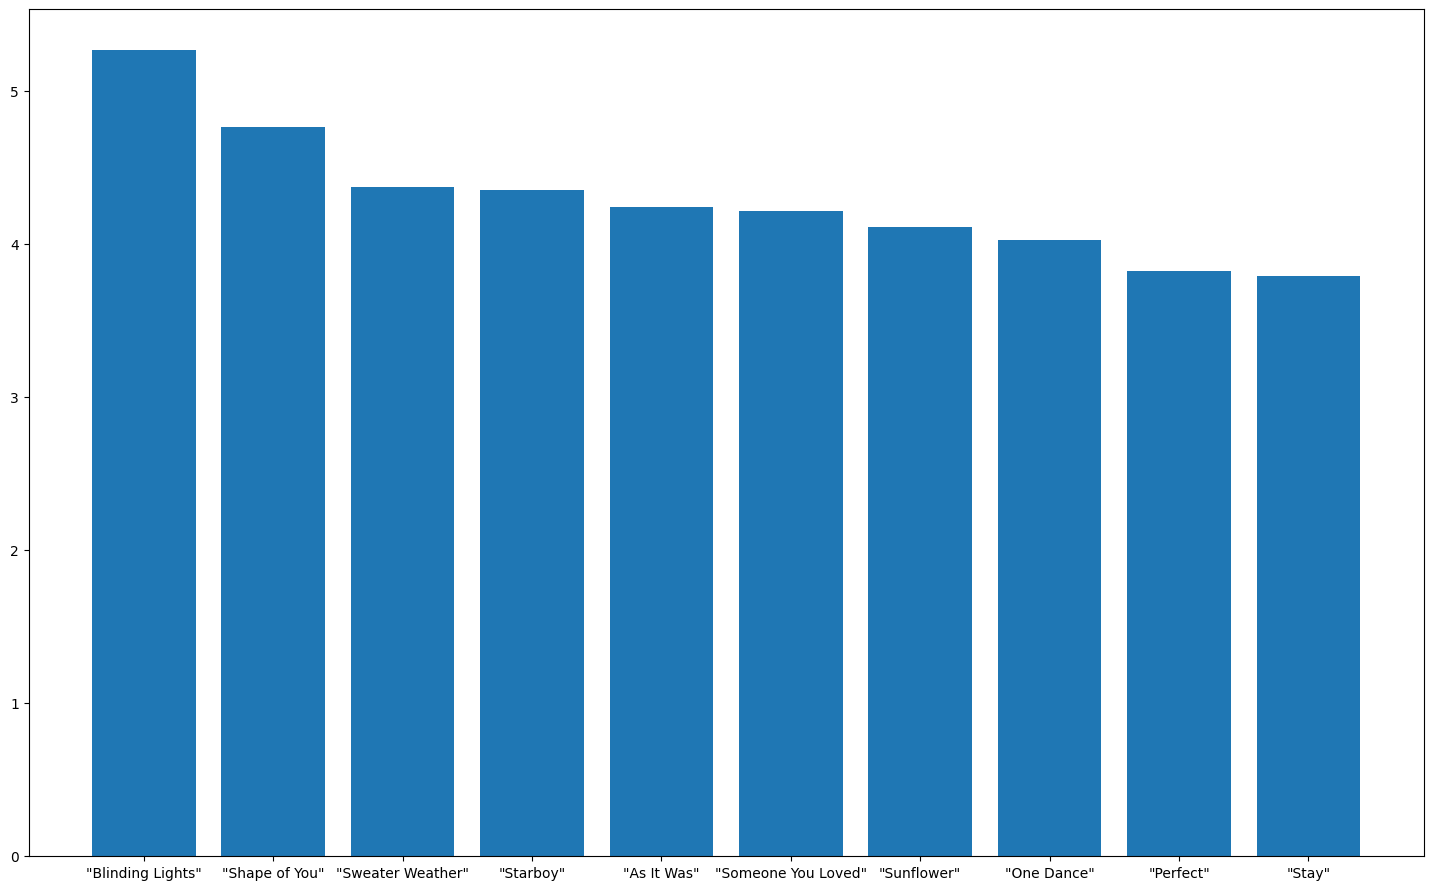

In [15]:
plt.figure(figsize=(18,11))
plt.bar(x= top10.Song , height = top10['Streams (billions)'])
plt.tight_layout
plt.show

In [16]:
conn = sqlite3.connect('canciones.db')
ranking.to_sql('mas_streameadas',conn,if_exists='replace',index= False)

100